# Интерполяция. 1-й закон Кеплера

## Условие

(M. T. Heath. ScientiЇc Computing: An Introductory Survey. McGraw-Hill, New York, 1997.) Вычисление К.Гауссом орбиты астероида Церера – по-видимому, первое использование метода наименьших квадратов. Данная задача составлена по мотивам этого исследования. Выражение  $z = ax^2 + bxy + cy^2 + dx+ey+f$ называется квадратичной формой. Множество точек $(x,y)$, для которых $z = 0$ называется кривой второго порядка или коническим сечением. К коническим сечениям относятся эллипсы, гиперболы и параболы. При некоторых значениях коэффициентов можно получить пустое множество, точку, прямую или пару прямых (параллельных или пересекающихся). Уравнение $z = 0$ можно нормализовать, разделив квадратичную форму на один из коэффициентов. Например, если $f \neq 0$, то мы можем разделить уравнение на $f$ и получить тем самым квадратичную форму с единичным свободным коэффициентом.

## Цель работы

 Известно, что небесные тела двигаются по эллиптическим орбитам (1-й закон Кеплера). Даны $10$ наблюдений движения одной планеты:
 ```
 x = np.array([1.02 .95 .87 .77 .67 .56 .44 .30 .16 .01])
 y = np.array([0.39 .32 .27 .22 .18 .15 .13 .12 .13 .15])
 ```
 * Методом наименьших квадратов определите коэффициенты квадратичной формы, положив $а=1$ и решив перепределенную $10 \times 5$ систему линейных уравнений относительно остальных коэффициентов. Изобразите орбиту планеты. На том же графике постройте заданные точки.
 * Рассматриваемая задача близка к задаче с неполным рангом (т.е. задаче с рангом меньшим $5$). Чтобы увидеть, к чему это приводит, внесите в векторы `x`, `y` небольшое возмущение, добавляя к каждой компоненте случайную величину, равномерно распределенную на отрезке $[-.005, .005]$. Вычислите новые коэффициенты и изобразите новую орбиту на прежнем графике. Объясните различие коэффициентов и орбит от прежних.

## Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.array([1.02, .95, .87, .77, .67, .56, .44, .30, .16, .01])
y = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15])

Создадим перепределенную $10 \times 5$ систему линейных уравнений относительно остальных коэффициентов, при условии, что $а = 1$

In [3]:
system = np.stack([y**2, x*y, x, y, np.ones(len(y))]).T

Линейную задачу наименьших квадратов решает функция `linalg.lstsq(X, y)`, воспользуемся ей, чтобы найти коэффициенты квадратичной формы

In [4]:
c, b, d, e, f = linalg.lstsq(system, x**2)[0]

Изобразим орбиту планеты и заданные точки

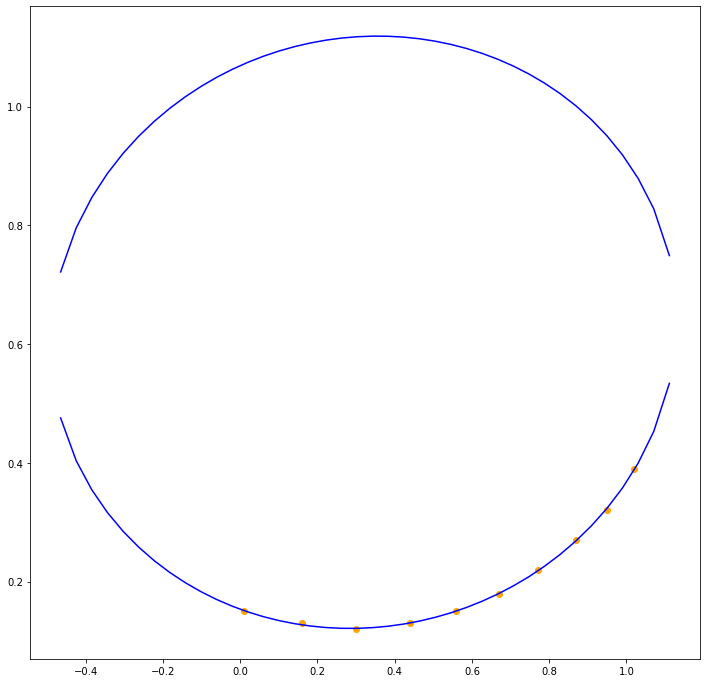

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color = 'orange')

all_x = np.linspace(-2.0, 2.0, 100)
ax.plot(all_x, (np.sqrt((b*all_x + e)**2 - 4*c*(d*all_x+f-all_x**2)) - b*all_x - e)/ (2*c), c = "b")
ax.plot(all_x, (-np.sqrt((b*all_x + e)**2 - 4*c*(d*all_x+f-all_x**2)) - b*all_x - e)/ (2*c), c = "b")

fig.set_figwidth(12)
fig.set_figheight(12)
plt.show()
pass

Внесем в векторы x, y небольшое возмущение, добавляя к каждой компоненте случайную величину, равномерно распределенную на отрезке $[-.005, .005]$

In [6]:
np.random.seed(11)
n = 10
max_val, min_val = 0.005, -0.005
range_size = (max_val - min_val)
x_standart = x + (np.random.rand(n) * range_size + min_val)
y_standart = y + (np.random.rand(n) * range_size + min_val)

Внесем возмущение, добавляя к каждой компоненте случайную величину, нормально распределенную на том же отрезке

In [7]:
m = 10
x_norm = x + (1/600)*np.random.randn(m)
y_norm = y + ((1/600))*np.random.randn(m)

Решаем методом наименьших квадратов для x и y с возмущениями

In [8]:
system_std = np.stack([y_standart**2, x_standart*y_standart, x_standart, y_standart, np.ones(len(y_standart))]).T
c_std, b_std, d_std, e_std, f_std = linalg.lstsq(system_std, x_standart**2)[0]

In [9]:
system_norm = np.stack([y_norm**2, x_norm*y_norm, x_norm, y_norm, np.ones(len(y_norm))]).T
c_nm, b_nm, d_nm, e_nm, f_nm = linalg.lstsq(system_norm, x_norm**2)[0]

Изобразим новые орбиты планеты и заданные точки

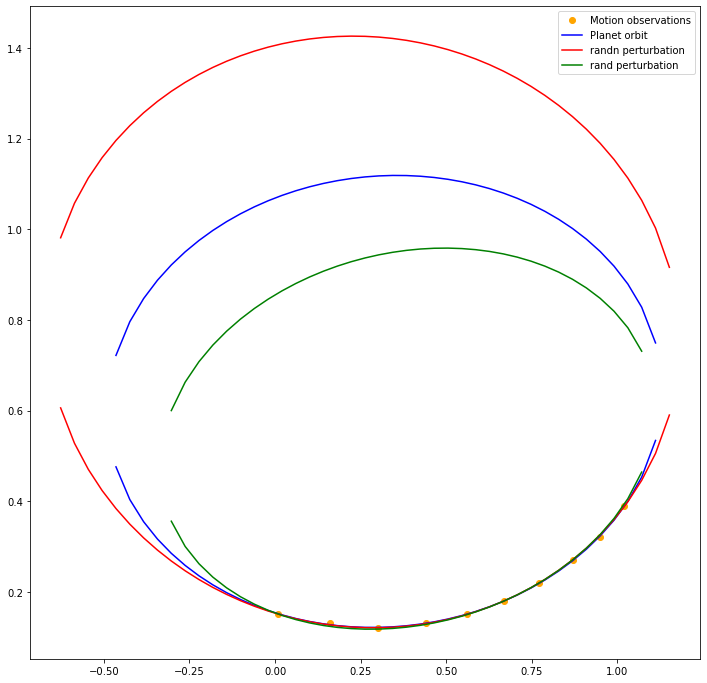

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color = 'orange', label = "Motion observations")
ax.plot(all_x, (np.sqrt((b*all_x + e)**2 - 4*c*(d*all_x+f-all_x**2)) - b*all_x - e)/ (2*c), c = "b", label = "Planet orbit")
ax.plot(all_x, (np.sqrt((b_nm*all_x + e_nm)**2 - 4*c_nm*(d_nm*all_x+f_nm-all_x**2)) - b_nm*all_x - e_nm)/ (2*c_nm), c = "r", label = "randn perturbation")
ax.plot(all_x, (np.sqrt((b_std*all_x + e_std)**2 - 4*c_std*(d_std*all_x+f_std-all_x**2)) - b_std*all_x - e_std)/ (2*c_std), c = "g", label = "rand perturbation")
ax.plot(all_x, (-np.sqrt((b_std*all_x + e_std)**2 - 4*c_std*(d_std*all_x+f_std-all_x**2)) - b_std*all_x - e_std)/ (2*c_std), c = "g")
ax.plot(all_x, (-np.sqrt((b*all_x + e)**2 - 4*c*(d*all_x+f-all_x**2)) - b*all_x - e)/ (2*c), c = "b")
ax.plot(all_x, (-np.sqrt((b_nm*all_x + e_nm)**2 - 4*c_nm*(d_nm*all_x+f_nm-all_x**2)) - b_nm*all_x - e_nm)/ (2*c_nm), c = "r")

ax.legend()
fig.set_figwidth(12)
fig.set_figheight(12)
plt.show()
pass

## Выводы

При изменении `np.random.seed()`, можно заметить, что орбита возмущений с равномерным и нормальным распределениями каждый раз меняют свое положение. Они могут быть очень похожи на орбиту исходных данных, но могут быть намного меньше или больше, а также могут отличаться по форме. Это вызвано значениями параметров b, c, d, e и f которые относительно сильно различаются для возмущенных данных. ПРи условии небольшого возмущения исходных данных, эффект будет велик.

In [11]:
print ("         c =", c, "b =", b, "d =", d, "e =", e, "f =", f)
print ("Uniform: c =", c_std, "b =", b_std, "d =", d_std, "e =", e_std, "f =", f_std)
print (" Normal: c =", c_nm, "b =", b_nm, "d =", d_nm, "e =", e_nm, "f =", f_nm)

         c = -2.6356254837121345 b = 0.14364618259890594 d = 0.5514469631403565 e = 3.2229403381058996 f = -0.4328942702644504
Uniform: c = -2.9450986133190757 b = 0.513581794491442 d = 0.4976874493537208 e = 2.970347542526082 f = -0.38597998633067254
 Normal: c = -1.998139051021954 b = -0.09097928420035917 d = 0.5858638943053895 e = 3.114724968463802 f = -0.42907771630559466


In [12]:
print ("Diff Uniform: c =", c - c_std, "b =", b-b_std, "d =", d-d_std, "e =", e-e_std, "f =", f-f_std)
print ("Diff  Normal: c =", c - c_nm, "b =", b-b_nm, "d =", d-d_nm, "e =", e-e_nm, "f =", f-f_nm)

Diff Uniform: c = 0.3094731296069413 b = -0.3699356118925361 d = 0.05375951378663568 e = 0.2525927955798175 f = -0.046914283933777834
Diff  Normal: c = -0.6374864326901803 b = 0.2346254667992651 d = -0.03441693116503308 e = 0.10821536964209777 f = -0.0038165539588557174


Кажется, что функции с возмущенными данными, не сильно отличаются от исходных, но полная орбита этих функций может широко варьироваться. Поскольку проблема заключается в неполном ранге, не все точки данных полностью независимы, и поэтому данных недостаточно, чтобы их можно было сопоставить. Поэтому небольшие возмущения могут иметь очень большие последствия, особенно если мыслить дело касается космических масштабов.